In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("train.csv")

# EDA

In [3]:
df.isna().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

In [4]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [5]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Filling null values

In [6]:
df['Product_Category_2'].fillna(df['Product_Category_2'].mean(),inplace=True)

/tmp/ipykernel_2989/3423733.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product_Category_2'].fillna(df['Product_Category_2'].mean(),inplace=True)


In [7]:
df["Product_Category_3"].fillna(df["Product_Category_3"].mean(),inplace=True)

/tmp/ipykernel_2989/307182009.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Product_Category_3"].fillna(df["Product_Category_3"].mean(),inplace=True)


In [8]:
df.isna().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2            False
Product_Category_3            False
Purchase                      False
dtype: bool

In [9]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

# Renaming the Columns

In [10]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [11]:
df.rename({"User_ID":"user_id","Product_ID":"product_id","Age":"age","Stay_In_Current_City_Years":"Stay"},axis=1,inplace=True)

In [12]:
df

,user_id,product_id,Gender,age,Occupation,City_Category,Stay,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.842329,12.668243,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.000000,14.000000,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.842329,12.668243,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.000000,12.668243,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.842329,12.668243,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,9.842329,12.668243,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,9.842329,12.668243,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,9.842329,12.668243,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,9.842329,12.668243,365


In [13]:
def convert_age_to_number(age_str):
    if "-" in age_str:
        start, end = map(int, age_str.split("-"))
        return (start + end/2) 
    elif "+" in age_str:
        return int(age_str[:-1])  
    else:
        return int(age_str) 

df["age"] = df["age"].apply(convert_age_to_number)

In [14]:
df.head(5)

,user_id,product_id,Gender,age,Occupation,City_Category,Stay,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,8.5,10,A,2,0,3,9.842329,12.668243,8370
1,1000001,P00248942,F,8.5,10,A,2,0,1,6.000000,14.000000,15200
2,1000001,P00087842,F,8.5,10,A,2,0,12,9.842329,12.668243,1422
3,1000001,P00085442,F,8.5,10,A,2,0,12,14.000000,12.668243,1057
4,1000002,P00285442,M,55.0,16,C,4+,0,8,9.842329,12.668243,7969


<Axes: xlabel='Gender', ylabel='Count'>

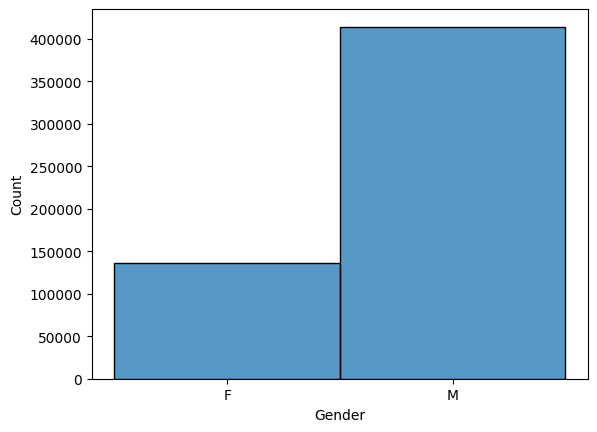

In [15]:
sns.histplot(df["Gender"])

<Axes: xlabel='Gender', ylabel='Product_Category_1'>

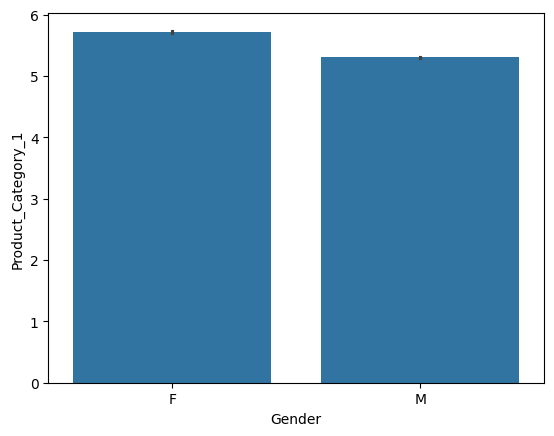

In [16]:
sns.barplot(x="Gender",y="Product_Category_1",data=df)

In [18]:
df["Occupation"].value_counts()

Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: count, dtype: int64

In [25]:
df["Product_Category_2"].value_counts()

Product_Category_2
9.842329     173638
8.000000      64088
14.000000     55108
2.000000      49217
16.000000     43255
15.000000     37855
5.000000      26235
4.000000      25677
6.000000      16466
11.000000     14134
17.000000     13320
13.000000     10531
9.000000       5693
12.000000      5528
10.000000      3043
3.000000       2884
18.000000      2770
7.000000        626
Name: count, dtype: int64

In [ ]:
df[""]